## Aprendendo usar o Google Colab de forma descomplicada

Podemos usar comandos Linux e Python, se clicarmos na tabela ao lado e subirmos um nivel veremos que temos um sistema linux aqui. Podemos listar pastas e usar o sistema como um sistema linux usando o comando !

In [0]:
#exibindo o root
!ls /

In [0]:
#exibindo a pasta content
!ls /content

Os mesmos comandos poderiam ser usados com o python para listar as pastas usando a biblioteca os

In [0]:
import os
os.listdir("/")

In [0]:
os.listdir("/content/")

Agora vamos aprender a montar nosso GDrive para usar ele como espaço de armazenamento

In [0]:
from google.colab import drive
#montar o Gdrive
drive.mount('/content/gdrive/', force_remount= True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


Acessando nossos arquivos pessoais do GDrive no formato Linux e Python

In [0]:
!ls "/content/gdrive/My Drive"
os.listdir("/content/gdrive/My Drive")

Acessando nossos arquivos das pastas compartilhadas do GDrive

In [0]:
os.listdir("/content/gdrive/Shared drives/ManicomioPython/")

Baixando coisas direto no nosso Gdrive

In [0]:
!wget https://tcxsproject.com.br/dev/Biblioteca%20de%20Scripts/appseed.rar -O /content/gdrive/Shared\ drives/ManicomioPython/nome.rar

--2020-05-19 15:49:33--  https://tcxsproject.com.br/dev/Biblioteca%20de%20Scripts/appseed.rar
Resolving tcxsproject.com.br (tcxsproject.com.br)... 92.249.44.26
Connecting to tcxsproject.com.br (tcxsproject.com.br)|92.249.44.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16937117 (16M) [application/x-rar-compressed]
Saving to: ‘/content/gdrive/Shared drives/ManicomioPython/nome.rar’

/content/gdrive/Sha 100%[===================>]  16.15M  2.38MB/s    in 6.8s    

2020-05-19 15:49:40 (2.38 MB/s) - ‘/content/gdrive/Shared drives/ManicomioPython/nome.rar’ saved [16937117/16937117]



In [0]:
import urllib.request
url = 'https://tcxsproject.com.br/dev/Biblioteca%20de%20Scripts/appseed.rar'
urllib.request.urlretrieve(url, '/content/gdrive/Shared drives/ManicomioPython/nome.rar')

('/content/gdrive/Shared drives/ManicomioPython/nome.rar',
 <http.client.HTTPMessage at 0x7f0a7b9f4c50>)

# Usando a camera ou a webcam

O Colab é um servidor e não seu pc, mesmo assim com um pouco de javascript da para fazer milagres por aqui.


In [0]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image
import matplotlib.pyplot as plt

#aqui não é uma maravilha como nosso pc portanto precisa deste padrao javascript 
VIDEO_HTML = """
<video autoplay
 width=%d height=%d style='cursor: pointer;'></video>
<script>

var video = document.querySelector('video')

navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)
  
var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""


def camera(filename='photo.jpg', quality=0.8, size=(800,600)):
  display(HTML(VIDEO_HTML % (size[0],size[1],quality)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  f = io.BytesIO(binary)
  return np.asarray(Image.open(f))
#   with open(filename, 'wb') as f:
#     f.write(binary)
#   return len(binary)


imagem = camera() 
plt.figure(figsize=(10,10))
plt.imshow(imgem)
plt.show()

# Reconhecendo textos em imagens

informativo
VACINACÄO
A Prefoitura do Promissäo, por meio da Secretaria
de Saüde recebeu do Ministérlo da Saüde, uma
nota informativa, do Departamento de Imunizacäo
e Doencas transmissiveis, sobre a situacäo das
vacinas.
A distribuicäo das vacinas para Os municipios é de
responsabilidade do Ministério da Saüde,
infelizmente, o Iote da Vacina Pentavalente foi
bloqueado pela ANVISA, interrompendo a
distribuicäo para as cidades.
A Profoitura esti om constante contato com Os
Orgäos responsåveis para normalizar a distribulcäo
da Pentavalente, podendo assim,
atender os promissenses.



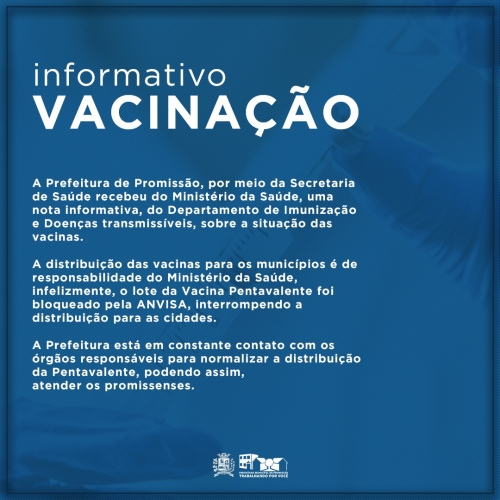

In [34]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import requests
import io
import json
import urllib.request


#faz o download da imagem
endereco_imagem = 'https://www.promissao.sp.gov.br/fotos/242db1a572863350cc537d53298344c0.jpg'
imagem_armazenada = urllib.request.urlretrieve(endereco_imagem, 'imagem_baixada.jpg')


#faz a leitura da imagem com o opencv
imagem = cv2.imread('imagem_baixada.jpg')
height, width, _ = imagem.shape


# Ocr API - conversor usado 
url = 'https://api.ocr.space/parse/image'
api =   '60664274c488957'

#passa imagem para a API 
_, compressedimage = cv2.imencode('qualquer_coisa.jpg', imagem, [1, 90])
file_bytes = io.BytesIO(compressedimage)
envia_foto = requests.post(url,  files = {'qualquer_coisa.jpg': file_bytes},  data = {'apikey': api})

#decodificar o resultado
resultado_decodificado = envia_foto.content.decode()

#resultado retornado da API
resultado = json.loads(resultado_decodificado)

#texto detectado
resultados_fornecidos = resultado.get('ParsedResults')[0]
texto_detectado = resultados_fornecidos.get('ParsedText')
print(texto_detectado)

#cv2_imshow aqui é diferente pois é uma das exigencias da google
cv2_imshow(imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()